# 1) KNeighbors in sklearn

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
dataset = datasets.load_breast_cancer()
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=2)

SyntaxError: invalid syntax (<ipython-input-16-8ae4dab71054>, line 1)

In [4]:
clf = KNeighborsClassifier()
clf.fit(x_train , y_train)
## general form of minkowski distance b/w Points is : 
## pow(Sigma(pow(|Xi - Yi| , p)) , 1 / p)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
clf.score(x_test , y_test)

0.9122807017543859

# 2) Cross Validation

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [7]:
iris = datasets.load_iris()
x_train , x_test , y_train , y_test = train_test_split(iris.data , iris.target , test_size = 0.2)


In [8]:
clf = LinearRegression()
cross_val_score(clf, x_train, y_train)
## Bydefault k = 3

array([0.95213439, 0.87494209, 0.92109252, 0.93818811, 0.95221561])

In [9]:
clf = LinearRegression()
cross_val_score(clf, iris.data, iris.target)
## because iris data has in sorted order first 50 belongs to class a
## next 50 to b and next 50 to c

array([0.        , 0.85124923, 0.        , 0.76155439, 0.        ])

In [10]:
## here sets are created in a shuffle manner
cross_val_score(clf , iris.data , iris.target , cv = KFold(3 , True , 0))
# KFold(k, random_shuffle, random_state = 0)

array([0.90322728, 0.92527008, 0.94214064])

# 3) Finding Optimal K

In [11]:
x_axis = []
y_axis = []
K = -10000
max_Score = 0
for i in range(1 , 26 , 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf , x_train , y_train)
    if(score.mean() > max_Score) :
        K = i
        max_Score = score.mean()
    x_axis.append(i)
    y_axis.append(score.mean())
    print("score for i =" , i , " is : " , score.mean())
print("optimal Value for K is : " , K)

score for i = 1  is :  0.9583333333333334
score for i = 3  is :  0.9666666666666668
score for i = 5  is :  0.9666666666666668
score for i = 7  is :  0.9666666666666668
score for i = 9  is :  0.975
score for i = 11  is :  0.9833333333333334
score for i = 13  is :  0.975
score for i = 15  is :  0.9666666666666668
score for i = 17  is :  0.95
score for i = 19  is :  0.95
score for i = 21  is :  0.95
score for i = 23  is :  0.9416666666666668
score for i = 25  is :  0.9416666666666668
optimal Value for K is :  11


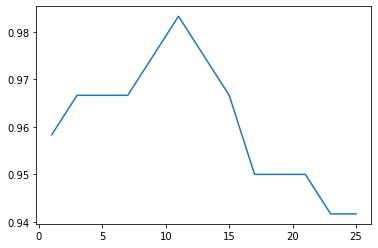

Optimal Value for K is :  11


In [12]:
import matplotlib.pyplot as plt
plt.plot(x_axis , y_axis)
plt.show()
print("Optimal Value for K is : " , K)

# 4) Implement KNN

In [13]:
def train(x, y):
    return

def predict_one(x_train , y_train , x_test , k):
    distances = []
    for i in range(len(x_train)):
        distance = (( x_train[i , : ] - x_test ) ** 2).sum()
        distances.append([distance , i])
    distances = sorted(distances)
    
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0] ## Give the 1 most common entry

def predict(x_train, y_train, x_test_data , k):
    predictions = []
    for x_test in x_test_data :
        predictions.append(predict_one(x_train, y_train, x_test, k))
    return predictions

In [14]:
y_pred = predict(x_train , y_train , x_test , 5)
accuracy_score(y_test , y_pred)

0.9666666666666667

In [15]:
a = [1, 0 , 1, 1, 1 , 1 , 0 , 2]
print(Counter(a))
Counter(a).most_common(1)[0][0]

Counter({1: 5, 0: 2, 2: 1})


1